In [0]:
import tensorflow
tensorflow.random.set_seed(1)

In [0]:
from numpy.random import seed

seed(1)

In [2]:
import datetime as dt
from dateutil.relativedelta import relativedelta

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from keras import backend as K
import keras
from keras.models import Model
from keras.layers import Dense, Input, LSTM, Dropout, Bidirectional, TimeDistributed, Flatten, Masking
from keras.optimizers import Adam, SGD
from keras import initializers

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


functions for loading from gdrive

In [0]:
#@title
import requests

def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)

    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)

    save_response_content(response, destination)    

def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value

    return None

def save_response_content(response, destination):
    CHUNK_SIZE = 1000

    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)


In [0]:
history_file_id = '14G4k5wkgEXVV2jK3yY_NYahLdWxIvuzQ'
download_file_from_google_drive(history_file_id, 'history.xlsx')

hist_df = pd.read_excel('history.xlsx', sheet_name='in', index_col=0)

In [5]:
hist_df[hist_df['DismissalDate'].isna() == False]['EmployeeID'].nunique()

1256

In [6]:
hist_df[hist_df['DismissalDate'].isna() == False]['EmployeeID'].unique()

array(['001502BB-B61A-404D-8A99-CC5DE5A4F985',
       '003D7C3B-AEDE-4780-A7D8-17ACD32DABCC',
       '0040B626-4578-4C4B-B3CB-42270CEAFF6C', ...,
       'FF9D0956-E4DC-47D4-85BA-C0C3F852824B',
       'FFA67FC0-7E99-489C-BE06-9AFB59A2A5D1',
       'FFD9088A-0788-4BF0-ABCF-4D54E6CF31FC'], dtype=object)

In [7]:
hist_df.groupby('EmployeeID').get_group('001502BB-B61A-404D-8A99-CC5DE5A4F985')[['Date', 'DismissalDate', 'diffs_between_dates', 'target']]

,Date,DismissalDate,diffs_between_dates,target
24,2017-07-01,2018-04-01,9,0
25,2017-08-01,2018-04-01,8,0
26,2017-09-01,2018-04-01,7,0
27,2017-10-01,2018-04-01,6,0
28,2017-11-01,2018-04-01,5,0
29,2017-12-01,2018-04-01,4,0
30,2018-01-01,2018-04-01,3,1
31,2018-02-01,2018-04-01,2,1
32,2018-03-01,2018-04-01,1,1


In [8]:
hist_df.groupby('EmployeeID').get_group('00FCA5BD-57A9-4776-ACC4-5C87AAE0981B')[['Date', 'DismissalDate', 'diffs_between_dates', 'target']]

,Date,DismissalDate,diffs_between_dates,target
0,2017-07-01,2019-02-01,19,0
1,2017-08-01,2019-02-01,18,0
2,2017-09-01,2019-02-01,17,0
3,2017-10-01,2019-02-01,16,0
4,2017-11-01,2019-02-01,15,0
5,2017-12-01,2019-02-01,14,0
6,2018-01-01,2019-02-01,13,0
7,2018-02-01,2019-02-01,12,0
8,2018-03-01,2019-02-01,11,0
9,2018-04-01,2019-02-01,10,0


In [9]:
hist_df.isna().sum()

EmployeeID                 0
Date                       0
DevCenterID                0
SBUID                      0
PositionID                 0
PositionLevel              0
IsTrainee                  0
LanguageLevelID            0
CustomerID                 0
ProjectID               5827
IsInternalProject          0
Utilization                0
HourVacation               0
HourSickness               0
HourMobileReserve          0
HourLockedReserve          0
OnSite                     0
CompetenceGroupID          0
FunctionalOfficeID         0
PaymentTypeId              0
BonusOneTime               0
APM                        0
WageGross                  0
HiringDate                 0
DismissalDate          72039
MonthOnPosition            0
MonthOnSalary              0
Quarter                    0
diffs_between_dates        0
Hired                      0
Dismissed                  0
target                     0
dtype: int64

Fill missing values in ProjectID col with 'missing' 

In [0]:
hist_df['ProjectID'] = hist_df['ProjectID'].fillna('missing')

DevCenterID


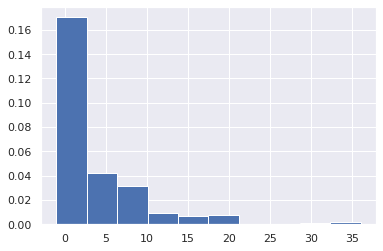

SBUID


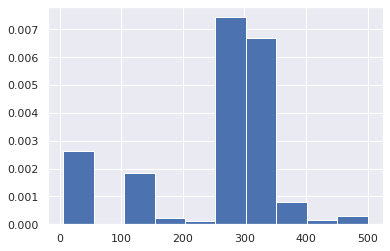

PositionID


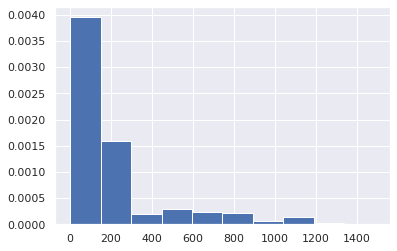

PositionLevel


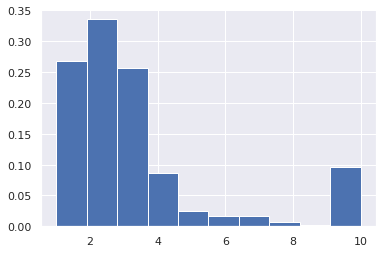

IsTrainee


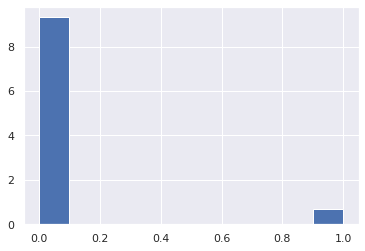

LanguageLevelID


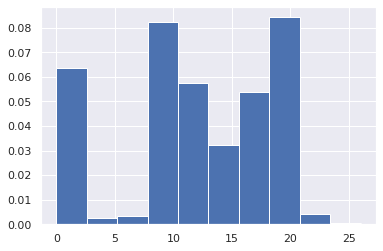

CustomerID


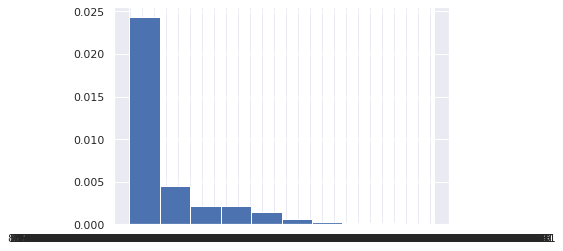

ProjectID


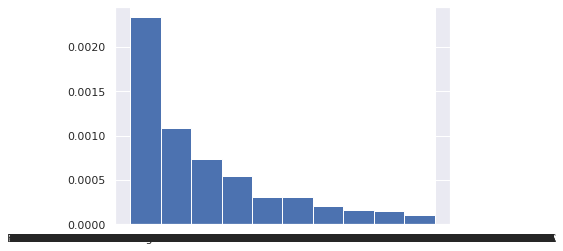

IsInternalProject


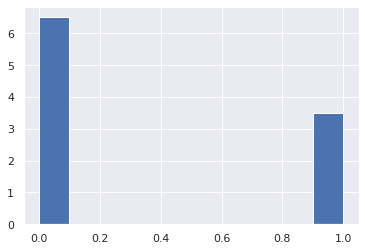

Utilization


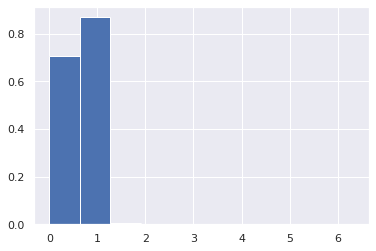

HourVacation


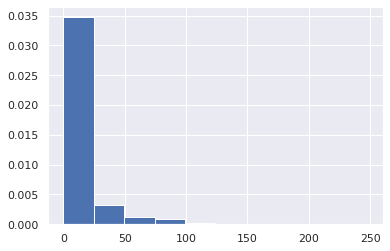

HourSickness


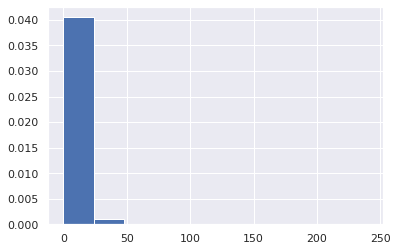

HourMobileReserve


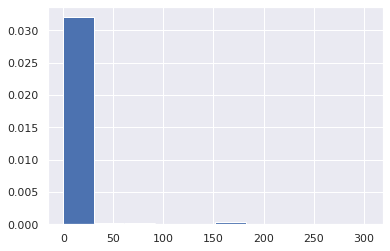

HourLockedReserve


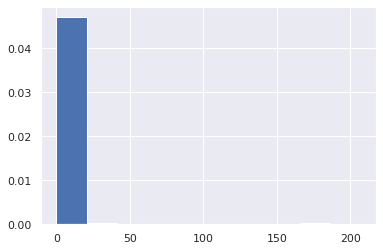

OnSite


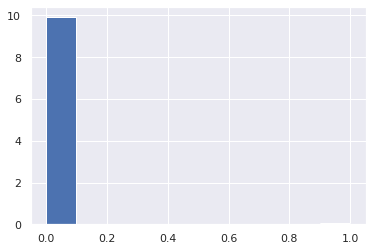

CompetenceGroupID


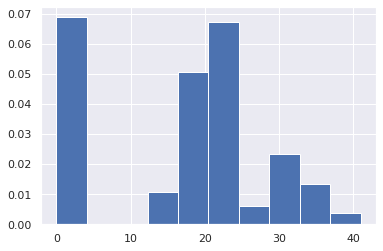

FunctionalOfficeID


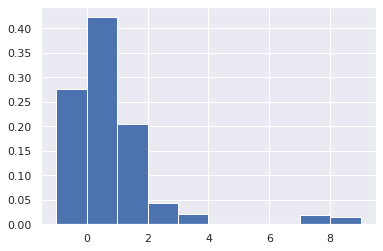

PaymentTypeId


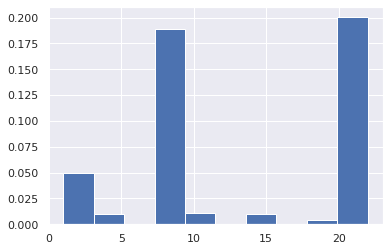

BonusOneTime


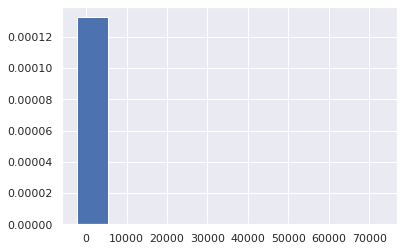

APM


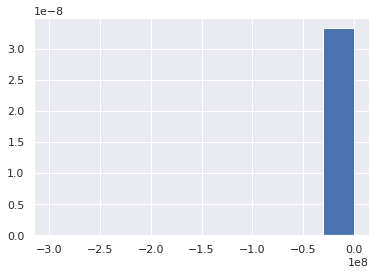

WageGross


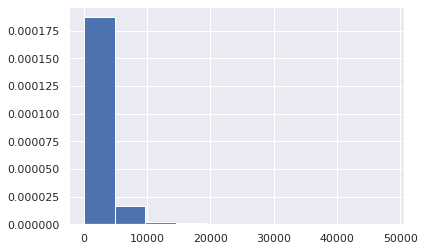

Hired


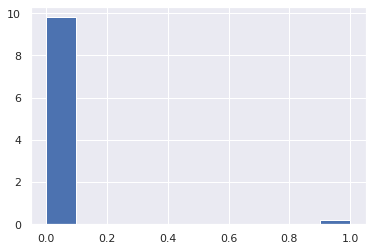

Dismissed


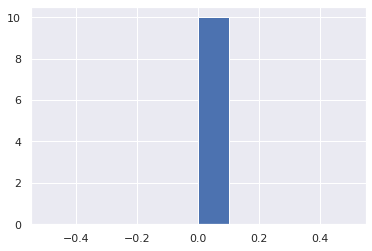

MonthOnPosition


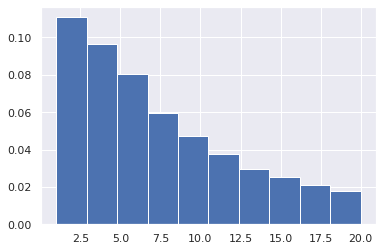

MonthOnSalary


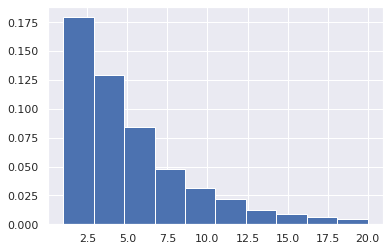

Quarter


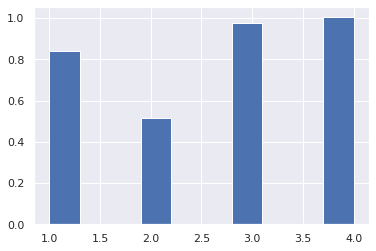

diffs_between_dates


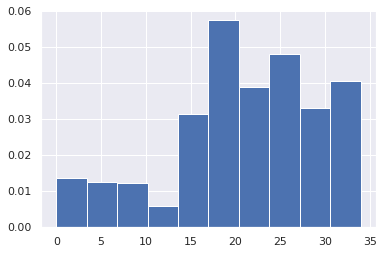

target


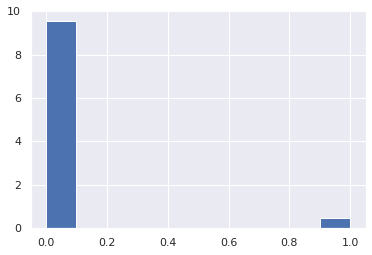

In [9]:
for col in list(hist_df.drop(['EmployeeID', 'Date', 'HiringDate', 'DismissalDate'], axis=1).columns):
  print(col)
  plt.hist(hist_df[col], density=True)
  plt.show()

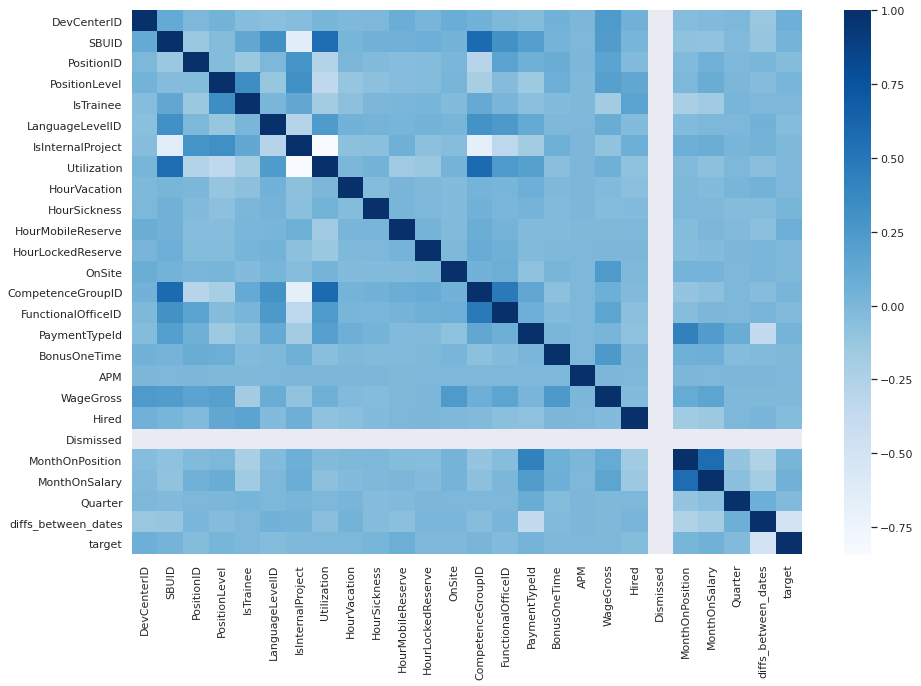

In [10]:
fig = plt.subplots(figsize=(15,10))
sns.heatmap(hist_df.corr(), cmap='Blues')
plt.show()

#### Process Features

In [0]:
# number of employees in dev center / total number of employees per date
DevCenterID_mapping = hist_df.groupby(['DevCenterID', 'Date'])['EmployeeID'].count() / hist_df.groupby(['Date'])['EmployeeID'].count()
DevCenterID_mapping = DevCenterID_mapping.reset_index(level=['DevCenterID',	'Date']).rename(columns={'EmployeeID':'DevCenter_count'})
hist_df = pd.merge(hist_df, DevCenterID_mapping, on=['DevCenterID',	'Date'], how='left')

In [0]:
# number of employees in SBUID / total number of employees per date
SBUID_mapping = hist_df.groupby(['SBUID', 'Date'])['EmployeeID'].count() / hist_df.groupby(['Date'])['EmployeeID'].count()
SBUID_mapping = SBUID_mapping.reset_index(level=['SBUID',	'Date']).rename(columns={'EmployeeID':'SBUID_count'})
hist_df = pd.merge(hist_df, SBUID_mapping, on=['SBUID',	'Date'], how='left')

In [0]:
# number of employees in CompetenceGroupID senter / total number of employees per date
CompetenceGroupID_mapping = hist_df.groupby(['CompetenceGroupID', 'Date'])['EmployeeID'].count() / hist_df.groupby(['Date'])['EmployeeID'].count()
CompetenceGroupID_mapping = CompetenceGroupID_mapping.reset_index(level=['CompetenceGroupID',	'Date']).rename(columns={'EmployeeID':'CompetenceGroupID_count'})
hist_df = pd.merge(hist_df, CompetenceGroupID_mapping, on=['CompetenceGroupID',	'Date'], how='left')

In [0]:
# number of employees in FunctionalOfficeID / total number of employees per date
FunctionalOfficeID_mapping = hist_df.groupby(['FunctionalOfficeID', 'Date'])['EmployeeID'].count() / hist_df.groupby(['Date'])['EmployeeID'].count()
FunctionalOfficeID_mapping = FunctionalOfficeID_mapping.reset_index(level=['FunctionalOfficeID',	'Date']).rename(columns={'EmployeeID':'FunctionalOfficeID_count'})
hist_df = pd.merge(hist_df, FunctionalOfficeID_mapping, on=['FunctionalOfficeID',	'Date'], how='left')

In [0]:
# number of employees with PositionID / total number of employees per date
PositionID_mapping = hist_df.groupby(['PositionID', 'Date'])['EmployeeID'].count() / hist_df.groupby(['Date'])['EmployeeID'].count()
PositionID_mapping = PositionID_mapping.reset_index(level=['PositionID',	'Date']).rename(columns={'EmployeeID':'PositionID_count'})
hist_df = pd.merge(hist_df, PositionID_mapping, on=['PositionID',	'Date'], how='left')

In [0]:
# number of employees with PaymentTypeId / total number of employees per date
PaymentTypeId_mapping = hist_df.groupby(['PaymentTypeId', 'Date'])['EmployeeID'].count() / hist_df.groupby(['Date'])['EmployeeID'].count()
PaymentTypeId_mapping = PaymentTypeId_mapping.reset_index(level=['PaymentTypeId',	'Date']).rename(columns={'EmployeeID':'PaymentTypeId_count'})
hist_df = pd.merge(hist_df, PaymentTypeId_mapping, on=['PaymentTypeId',	'Date'], how='left')

In [0]:
# number of projects of customer / total number of projects per date
CustomerID_mapping = hist_df.groupby(['CustomerID', 'Date'])['ProjectID'].count() / hist_df.groupby(['Date'])['ProjectID'].count()
CustomerID_mapping = CustomerID_mapping.reset_index(level=['CustomerID',	'Date']).rename(columns={'ProjectID':'CustomerID_count'})
hist_df = pd.merge(hist_df, CustomerID_mapping, on=['CustomerID',	'Date'], how='left')

In [0]:
# number of projects of customer / total number of projects per date
ProjectID_mapping = hist_df.groupby(['ProjectID', 'Date'])['EmployeeID'].count() / hist_df.groupby(['Date'])['EmployeeID'].count()
ProjectID_mapping = ProjectID_mapping.reset_index(level=['ProjectID',	'Date']).rename(columns={'EmployeeID':'ProjectID_count'})
hist_df = pd.merge(hist_df, ProjectID_mapping, on=['ProjectID',	'Date'], how='left')

Fix date

In [19]:
hist_df['Date'] = pd.to_datetime(hist_df['Date'], format='%Y-%m-%d')
hist_df['DismissalDate'] = pd.to_datetime(hist_df['DismissalDate'], format='%Y-%m-%d')
hist_df['HiringDate'] = pd.to_datetime(hist_df['HiringDate'], format='%Y-%m-%d')

#number of dismissed employees
hist_df[hist_df['DismissalDate'].isna() == False]['EmployeeID'].nunique()

1256

In [0]:
def calc_relative_monthonposition(x):
  # month on position calculates as for the end of month that's why x['Date'].dt.month + 1
  # hiring_date = empl_df[empl_df['EmployeeID'] == x['EmployeeID'][0]]['HiringDate'].item()
  hiring_date = x['HiringDate'].item()
  series = x['MonthOnPosition'] / ((x['Date'].dt.year - hiring_date.year) * 12 + (x['Date'].dt.month + 1 - hiring_date.month))
  series = series.rename("MonthOnPosition_relative") 
  return series

In [0]:
monthonposition_mapping = hist_df.groupby(['EmployeeID', 'Date', 'MonthOnPosition']).apply(calc_relative_monthonposition).reset_index(level=['EmployeeID', 'Date', 'MonthOnPosition'])
hist_df = pd.merge(hist_df, monthonposition_mapping, on=['EmployeeID', 'Date', 'MonthOnPosition'], how='left')

In [22]:
hist_df[hist_df['MonthOnPosition_relative'].isin([np.inf])]

,EmployeeID,Date,DevCenterID,SBUID,PositionID,PositionLevel,IsTrainee,LanguageLevelID,CustomerID,ProjectID,IsInternalProject,Utilization,HourVacation,HourSickness,HourMobileReserve,HourLockedReserve,OnSite,CompetenceGroupID,FunctionalOfficeID,PaymentTypeId,BonusOneTime,APM,WageGross,HiringDate,DismissalDate,MonthOnPosition,MonthOnSalary,Quarter,diffs_between_dates,Hired,Dismissed,target,DevCenter_count,SBUID_count,CompetenceGroupID_count,FunctionalOfficeID_count,PositionID_count,PaymentTypeId_count,CustomerID_count,ProjectID_count,MonthOnPosition_relative


In [0]:
def calc_relative_monthonsalary(x):
  # month on salary calculates as for the end of month that's why x['Date'].dt.month + 1
  # hiring_date = empl_df[empl_df['EmployeeID'] == x['EmployeeID'][0]]['HiringDate'].item()
  hiring_date = x['HiringDate'].item()
  series = x['MonthOnSalary'] / ((x['Date'].dt.year - hiring_date.year) * 12 + (x['Date'].dt.month + 1 - hiring_date.month))
  series = series.rename("MonthOnSalary_relative") 
  return series

In [0]:
monthonsalary_mapping = hist_df.groupby(['EmployeeID', 'Date', 'MonthOnSalary']).apply(calc_relative_monthonsalary).reset_index(level=['EmployeeID', 'Date', 'MonthOnSalary'])
hist_df = pd.merge(hist_df, monthonsalary_mapping, on=['EmployeeID', 'Date', 'MonthOnSalary'], how='left')

In [0]:
def calc_month_in_ss(x):
  # hiring_date = empl_df[empl_df['EmployeeID'] == x['EmployeeID'][0]]['HiringDate'].item()
  hiring_date = x['HiringDate'].item()
  series = (x['Date'].dt.year - hiring_date.year) * 12 + (x['Date'].dt.month + 1 - hiring_date.month)
  series = series.rename("MonthSS") 
  return series

In [0]:
monthSS_mapping = hist_df.groupby(['EmployeeID', 'Date']).apply(calc_month_in_ss).reset_index(level=['EmployeeID', 'Date'])
hist_df = pd.merge(hist_df, monthSS_mapping, on=['EmployeeID', 'Date'], how='left')

In [0]:
hist_df['HourVacation_relative'] = hist_df['HourVacation'] / 8 / hist_df['Date'].dt.daysinmonth
hist_df['HourSickness_relative'] = hist_df['HourSickness'] / 8 / hist_df['Date'].dt.daysinmonth
hist_df['HourMobileReserve_relative'] = hist_df['HourMobileReserve'] / 8 / hist_df['Date'].dt.daysinmonth
hist_df['HourLockedReserve_relative'] = hist_df['HourLockedReserve'] / 8 / hist_df['Date'].dt.daysinmonth

#### transform dataset

In [31]:
hist_df['target'].value_counts()

0    82742
1     3768
Name: target, dtype: int64

In [32]:
hist_df[~((hist_df['target'] == 1) & (hist_df['diffs_between_dates'] == 0) & (hist_df['DismissalDate'].isna() == False))]['target'].value_counts()

0    82742
1     3768
Name: target, dtype: int64

In [33]:
train_date = hist_df.Date.max() - pd.DateOffset(months=3)
train_date

Timestamp('2018-11-01 00:00:00')

In [34]:
max_date = hist_df.Date.max()
max_date = max_date.strftime('%Y-%m-%d')
test_date = (dt.datetime.strptime(max_date, '%Y-%m-%d') - pd.DateOffset(months=1))
test_date

Timestamp('2019-01-01 00:00:00')

In [0]:
def get_previous_months(original, columns):
  #print(original.EmployeeID.unique())
#     display(original)
  combined = original[['EmployeeID',	'Date', 'target']]
  combined = pd.concat([combined, original[columns]], axis = 1)
  for shift_i, n in ((1,'_M3'),(2,'_M2'),(3,'_M1')):
    subset_shifted = original[columns].shift(shift_i)
    subset_shifted.columns = [s + str(n) for s in columns]
    combined = pd.concat([combined, subset_shifted], axis = 1)
  return combined

In [0]:
columns_shift = ['IsTrainee', 'LanguageLevelID', 'IsInternalProject', 'Utilization', 'OnSite',
           'WageGross', 'BonusOneTime', 'APM', 'PositionLevel', 'DevCenter_count', 'SBUID_count',
           'CompetenceGroupID_count', 'FunctionalOfficeID_count', 'CustomerID_count', 'ProjectID_count',
           'MonthOnPosition_relative', 'MonthOnSalary_relative', 'MonthSS',
            'HourVacation_relative', 'HourSickness_relative',
           'HourMobileReserve_relative', 'HourLockedReserve_relative', 'PositionID_count', 'PaymentTypeId_count']

In [0]:
shifted_by_3m_hist_df = hist_df.groupby('EmployeeID').apply(lambda x: get_previous_months(x,columns=columns_shift))

In [0]:
def cut_3months(group):
  group_cut = group.iloc[3:]
  return group_cut

In [0]:
shifted_by_3m_hist_df = shifted_by_3m_hist_df.groupby(['EmployeeID']).apply(cut_3months)

In [0]:
shifted_by_3m_hist_df.reset_index(drop=True, inplace=True)

In [44]:
len(shifted_by_3m_hist_df.EmployeeID.unique()), shifted_by_3m_hist_df.shape

(5373, (70391, 99))

In [45]:
train_date = shifted_by_3m_hist_df.Date.max() - pd.DateOffset(months=3)
train_date

Timestamp('2018-11-01 00:00:00')

In [46]:
max_date = shifted_by_3m_hist_df.Date.max()
max_date = max_date.strftime('%Y-%m-%d')
test_date = (dt.datetime.strptime(max_date, '%Y-%m-%d') - pd.DateOffset(months=1))
test_date

Timestamp('2019-01-01 00:00:00')

In [0]:
X_train = shifted_by_3m_hist_df[shifted_by_3m_hist_df.Date < train_date]
# y_train_new = shifted_by_3m_hist_df[shifted_by_3m_hist_df.Date < train_date_new].target
X_test = shifted_by_3m_hist_df[(shifted_by_3m_hist_df.Date > train_date) & (shifted_by_3m_hist_df.Date < test_date)]
# y_test_new = shifted_by_3m_hist_df[(shifted_by_3m_hist_df.Date > train_date_new) & (shifted_by_3m_hist_df.Date < test_date_new)].target
X_test_one_month = shifted_by_3m_hist_df[(shifted_by_3m_hist_df.Date == train_date)]
# y_test1_new = shifted_by_3m_hist_df[(shifted_by_3m_hist_df.Date == train_date_new)].target
X_apply = shifted_by_3m_hist_df[(shifted_by_3m_hist_df.Date > train_date)]
# y_apply_new = shifted_by_3m_hist_df[(shifted_by_3m_hist_df.Date > train_date_new)].target

In [0]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [0]:
sc = MinMaxScaler((0, 1))

In [50]:
hist_df[hist_df['MonthOnSalary_relative'].isin([np.inf, -np.inf])]

,EmployeeID,Date,DevCenterID,SBUID,PositionID,PositionLevel,IsTrainee,LanguageLevelID,CustomerID,ProjectID,IsInternalProject,Utilization,HourVacation,HourSickness,HourMobileReserve,HourLockedReserve,OnSite,CompetenceGroupID,FunctionalOfficeID,PaymentTypeId,BonusOneTime,APM,WageGross,HiringDate,DismissalDate,MonthOnPosition,MonthOnSalary,Quarter,diffs_between_dates,Hired,Dismissed,target,DevCenter_count,SBUID_count,CompetenceGroupID_count,FunctionalOfficeID_count,PositionID_count,PaymentTypeId_count,CustomerID_count,ProjectID_count,MonthOnPosition_relative,MonthOnSalary_relative,MonthSS,HourVacation_relative,HourSickness_relative,HourMobileReserve_relative,HourLockedReserve_relative


In [51]:
sc.fit(X_train.iloc[:, 3:])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [52]:
X_train.iloc[:, 3:] = sc.transform(X_train.iloc[:, 3:])
X_test_one_month.iloc[:, 3:] = sc.transform(X_test_one_month.iloc[:, 3:])

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [53]:
X_test.iloc[:, 3:] = sc.transform(X_test.iloc[:, 3:])
X_apply.iloc[:, 3:] = sc.transform(X_apply.iloc[:, 3:])

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [54]:
X_train.shape, X_test_one_month.shape

((53134, 99), (4330, 99))

In [55]:
max(X_train.groupby('EmployeeID').size().max(), X_test.groupby('EmployeeID').size().max(), X_test_one_month.groupby('EmployeeID').size().max(), X_apply.groupby('EmployeeID').size().max())

13

In [0]:
def reframe_one_sample(df, n_features, pad_len=13):
  target = df['target'].iloc[-1]
  x = df.iloc[:, 3:].values.reshape(df.shape[0], 3 + 1, n_features)
  x = np.pad(x, [(0, pad_len - x.shape[0]), (0, 0), (0, 0)], 'constant', constant_values=(100))
  return (x, target)

In [0]:
X_train_samples = []
y_train_targets = []
for sample, y in X_train.groupby('EmployeeID').apply(lambda x: reframe_one_sample(x, n_features=len(columns_shift))):
  X_train_samples.append(sample)
  y_train_targets.append(y)

In [58]:
np.array(X_train_samples).shape, np.array(y_train_targets).shape

((5079, 13, 4, 24), (5079,))

In [0]:
X_test_one_month_samples = []
y_test_one_month_target = []
for sample, y in X_test_one_month.groupby('EmployeeID').apply(lambda x: reframe_one_sample(x, n_features=len(columns_shift))):
  X_test_one_month_samples.append(sample)
  y_test_one_month_target.append(y)

In [0]:
X_test_samples = []
y_test_target = []
for sample, y in X_test.groupby('EmployeeID').apply(lambda x: reframe_one_sample(x, n_features=len(columns_shift))):
  X_test_samples.append(sample)
  y_test_target.append(y)

In [61]:
np.array(X_test_one_month_samples).shape, np.array(y_test_one_month_target).shape

((4330, 13, 4, 24), (4330,))

In [0]:
from keras import backend as K
import keras
from keras.models import Model
from keras.layers import Dense, Input, LSTM, Dropout, Bidirectional, TimeDistributed, Flatten, Masking, Conv1D, MaxPooling1D
from keras.optimizers import Adam, SGD
from keras import initializers

In [0]:

def recall_metrics(y_true, y_pred):
  true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
  possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
  recall = true_positives / (possible_positives + K.epsilon())
  return recall


def precision_metrics(y_true, y_pred):
  true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
  predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
  precision = true_positives / (predicted_positives + K.epsilon())
  return precision

def fb_metrics(beta=1.7):
  def fb_m(y_true, y_pred):
    precision = precision_metrics(y_true, y_pred)
    recall = recall_metrics(y_true, y_pred)
    return (1+beta ** 2)*((precision*recall)/(beta ** 2 * precision+recall+K.epsilon()))
  return fb_m

In [0]:
initializer = initializers.glorot_normal()

In [65]:
X_train_samples[0].shape

(13, 4, 24)

In [0]:
model = keras.Sequential()
model.add(TimeDistributed(Flatten(input_shape=(4,24))))
model.add(Masking(mask_value=100))
model.add(LSTM(6,return_sequences=False,
               input_shape=(13,4,24),
               activation='relu'))
model.add(Dropout(0.2))
# model.add(LSTM(4,return_sequences=False, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(2, activation='relu', kernel_initializer=initializer, bias_initializer=initializers.Constant(0.001)))
model.add(Dense(1,activation='sigmoid'))

In [0]:
# inputs = Input(shape=(13, 4, 24))
# x = TimeDistributed(LSTM(2,return_sequences=False)) (inputs)
# # x = TimeDistributed(LSTM(12,return_sequences=True)) (inputs)
# # x = TimeDistributed(LSTM(4, return_sequences=False))(x)
# x = Flatten()(x)
# outputs = Dense(1, activation='sigmoid') (x)
# model = Model(inputs=inputs, outputs=outputs)

In [0]:
metrics = [
    recall_metrics,
    precision_metrics,
    fb_metrics(beta=1.7)
]

adam = Adam(lr=1e-5, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss='binary_crossentropy', metrics=[metrics], optimizer=adam)

In [68]:
weight_for_1 = (1 / len(np.where(np.array(y_train_targets) == 0)[0]))*(len(y_train_targets))/2.0 
weight_for_2 = (1 / len(np.where(np.array(y_train_targets) == 1)[0]))*(len(y_train_targets))/2.0

class_weight = {0: weight_for_1, 1: weight_for_2}

print('Weight for class 1: {:.2f}'.format(weight_for_1))
print('Weight for class 2: {:.2f}'.format(weight_for_2))

Weight for class 1: 0.62
Weight for class 2: 2.62


In [616]:
len(np.where(np.array(y_test_one_month_target) == 1)[0])

393

In [599]:
history = model.fit(np.array(X_train_samples), np.array(y_train_targets),
          validation_data = [np.array(X_test_one_month_samples), np.array(y_test_one_month_target)],
          class_weight=class_weight,
          epochs=100,
          batch_size=64,
          callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)]
          )

Train on 5079 samples, validate on 4330 samples
Epoch 1/100
5079/5079 [==============================] - 2s 330us/step - loss: 0.7241 - recall_metrics: 0.9630 - precision_metrics: 0.1906 - fb_m: 0.4649 - val_loss: 0.7220 - val_recall_metrics: 0.9888 - val_precision_metrics: 0.0921 - val_fb_m: 0.2777
Epoch 2/100
5079/5079 [==============================] - 1s 217us/step - loss: 0.7173 - recall_metrics: 0.9666 - precision_metrics: 0.1929 - fb_m: 0.4697 - val_loss: 0.7197 - val_recall_metrics: 0.9888 - val_precision_metrics: 0.0929 - val_fb_m: 0.2795
Epoch 3/100
5079/5079 [==============================] - 1s 203us/step - loss: 0.7140 - recall_metrics: 0.9631 - precision_metrics: 0.1931 - fb_m: 0.4688 - val_loss: 0.7177 - val_recall_metrics: 0.9888 - val_precision_metrics: 0.0937 - val_fb_m: 0.2815
Epoch 4/100
5079/5079 [==============================] - 1s 204us/step - loss: 0.7095 - recall_metrics: 0.9599 - precision_metrics: 0.1934 - fb_m: 0.4678 - val_loss: 0.7160 - val_recall_metrics

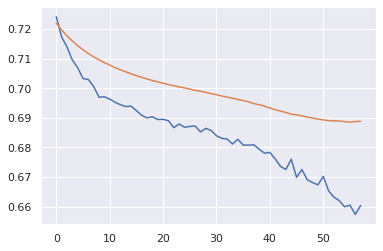

In [600]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [0]:
from sklearn.metrics import confusion_matrix, fbeta_score

In [0]:
def to_labels(pos_probs, threshold):
  return (pos_probs >= threshold).astype('int')

In [0]:
#train

In [601]:
confusion_matrix(np.array(y_train_targets), (model.predict(np.array(X_train_samples)) > 0.5).astype(int))

array([[2789, 1320],
       [ 441,  529]])

In [0]:
#test

In [615]:
confusion_matrix(np.array(y_test_one_month_target), (y_test_one_month_target_probas > 0.5).astype(int))

array([[2460, 1477],
       [ 188,  205]])

In [611]:
y_test_one_month_target_probas = model.predict(np.array(X_test_one_month_samples))
thresholds = np.arange(0, 1, 0.001)
scores = [fbeta_score(y_test_one_month_target, to_labels(y_test_one_month_target_probas, t) , beta=1.7) for t in thresholds]
ix = np.argmax(scores)
print(f'Best threshold {thresholds[ix]}, best score fbeta {scores[ix]}')

Best threshold 0.486, best score fbeta 0.3014030006058872


In [612]:
confusion_matrix(np.array(y_test_one_month_target), (y_test_one_month_target_probas > thresholds[ix]).astype(int))

array([[ 977, 2960],
       [  49,  344]])

In [0]:
#validation

In [603]:
confusion_matrix(np.array(y_test_target), (model.predict(np.array(X_test_samples)) > 0.5).astype(int))

array([[2451, 1643],
       [ 174,  181]])

In [607]:
fbeta_score(np.array(y_test_target), (model.predict(np.array(X_test_samples)) > 0.5).astype(int), beta=1.71)

0.24816503383669533

In [613]:
y_test_target_probas = model.predict(np.array(X_test_samples))
thresholds = np.arange(0, 1, 0.001)
scores = [fbeta_score(y_test_target, to_labels(y_test_target_probas, t) , beta=1.7) for t in thresholds]
ix = np.argmax(scores)
print(f'Best threshold {thresholds[ix]}, best score fbeta {scores[ix]}')

Best threshold 0.485, best score fbeta 0.27058255241039514


In [614]:
confusion_matrix(np.array(y_test_target), (model.predict(np.array(X_test_samples)) > thresholds[ix]).astype(int))

array([[ 786, 3308],
       [  31,  324]])